In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde 
from diagram_estimations import draw_mm_diagrams, draw_mle_diagrams, draw_ls_diagrams, draw_hist_kde

dfo = pd.read_csv('./data/FW_Veg_Rem_Combined.csv')

s_c = 'ALL'
property = 'Hum_pre_7'

cont_columns_prefix = ['Prec_pre_', "Temp_pre_", "Wind_pre_", "Hum_pre_"]
columns_suffix = [7, 15, 30]

weather_columns = [ x + str(y) for x in cont_columns_prefix for y in columns_suffix]

def preprocess_missing_weather_data(df):
    df_subsample = df[df['Temp_pre_7'] == -1]
    df_clean = df[df['Temp_pre_7'] != -1]
    mean_weather_data = df_clean.groupby(['state', 'discovery_month'])[weather_columns].mean().reset_index()
    df_subsample.drop(weather_columns, axis=1, inplace=True)
    df_subsample = df_subsample.merge(mean_weather_data)
    df_clean = df_clean.append(df_subsample, ignore_index=True)
    return df_clean

df_sampled = preprocess_missing_weather_data(dfo)

kernel = gaussian_kde(df_sampled[property])
min_amount, max_amount = df_sampled[property].min(), df_sampled[property].max()

print(f'min value: {min_amount}; max value: {max_amount}')

min value: 0.0; max value: 96.0


/home/patrik-sh/Documents/ITMO_Classes/Multivariate/tasks/Task1/venv/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


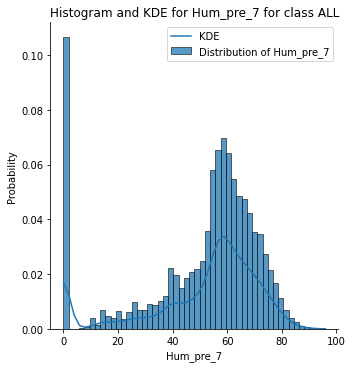

In [3]:
x = np.linspace(min_amount, max_amount, num=50)
kde_values = kernel(x)

draw_hist_kde(df_sampled, x, s_c, property, kde_values, 50)

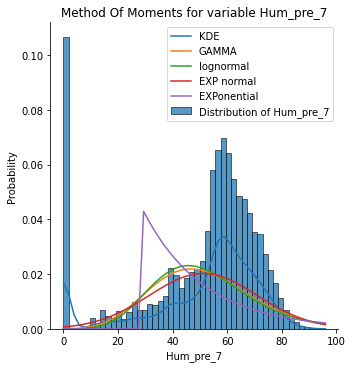

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9999448565482179, pvalue=2.3753487964102763e-213), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.66393602424759, pvalue=5.205373909689115e-10)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9999941980813843, pvalue=3.017252290030579e-262), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.66638026599327, pvalue=5.219192855676624e-10)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9953765377421548, pvalue=3.543201355526057e-117), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.43719458408133, pvalue=4.0568981507504986e-10)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)


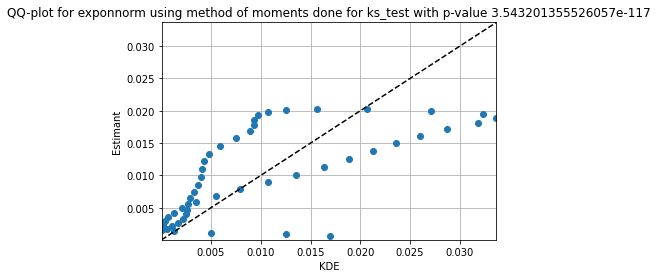

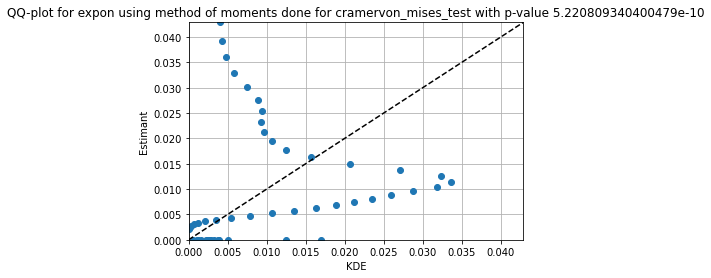

In [4]:
draw_mm_diagrams(df_sampled, x, s_c, property, kde_values, 50)

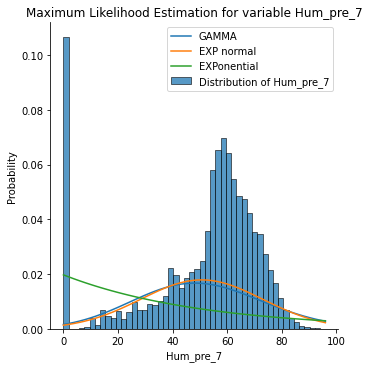

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9870159967664878, pvalue=9.363985755331627e-95), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.027357823397157, pvalue=5.737661901150659e-09)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9884642446810796, pvalue=2.531231028263145e-97), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.09776047382284, pvalue=6.1512743787517365e-09)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=0.999335622072731, pvalue=2.6411299189426387e-159), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.65189962965081, pvalue=5.1378135079716e-10)


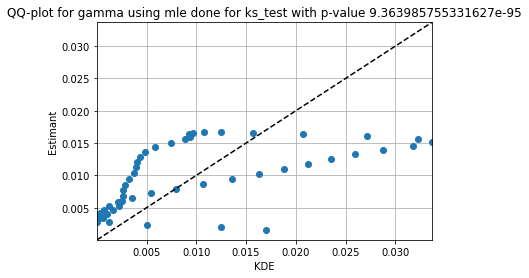

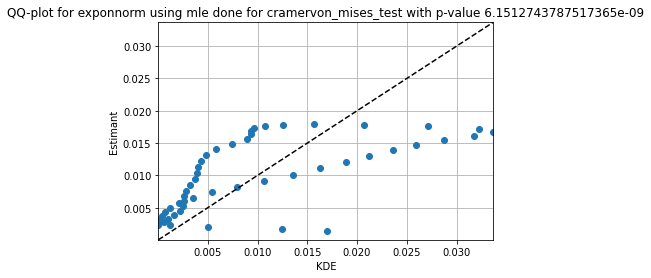

In [5]:
draw_mle_diagrams(df_sampled, x, s_c, property, kde_values, 50)

[2.43429308e-03 6.00408091e+01 1.32100957e+01]
[52.89795772 86.63170277 22.28520538]


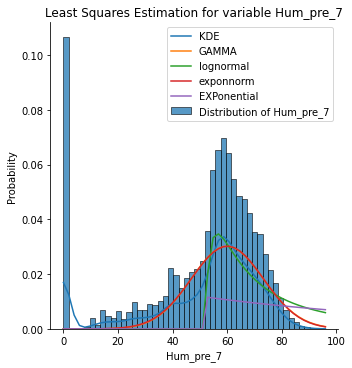

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9999987616525277, pvalue=8.773160950476971e-296), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666605208333085, pvalue=5.220462950816795e-10)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9999972524756486, pvalue=1.770547201987864e-278), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666530210429613, pvalue=5.220038845621389e-10)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)


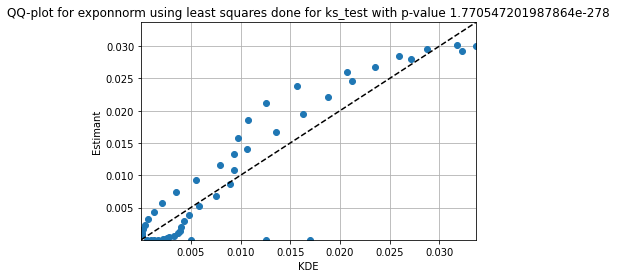

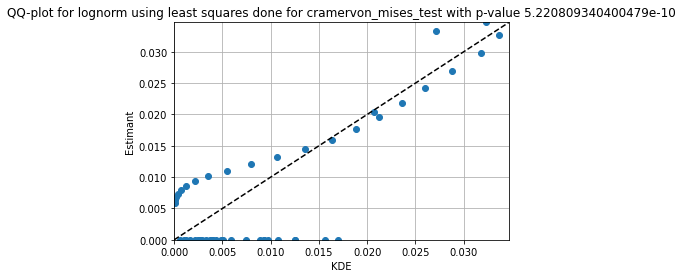

In [6]:
draw_ls_diagrams(df_sampled, x, s_c, property, kde_values, 50)

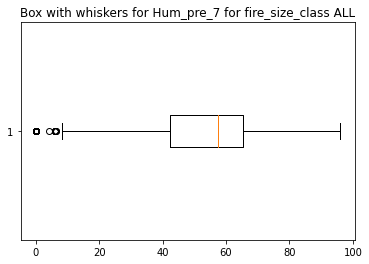

In [7]:
plt.boxplot(df_sampled[property], vert=False)
plt.title(f'Box with whiskers for {property} for fire_size_class {s_c}')
WHISKERS_FOLDER = './figures/whiskers/'
plt.savefig(f'{WHISKERS_FOLDER}whiskers_{property}_{s_c}.png')
plt.show()